 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [290]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [163]:
# Reading whale returns
filepath = Path("../Starter_Code/whale_returns.csv")
whale_returns = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index(inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [164]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [165]:
# Drop nulls
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [166]:
# Reading algorithmic returns
filepath1 = Path("../Starter_Code/algo_returns.csv")
algo_returns = pd.read_csv(filepath1, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [167]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [168]:
# Drop nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [169]:
# Reading S&P TSX 60 Closing Prices
filepath2 = Path("../Starter_Code/sp_tsx_history.csv")
sp_tsx = pd.read_csv(filepath2, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_tsx.sort_index(inplace = True)
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [170]:
# Check Data Types
print(sp_tsx.dtypes)

Close    object
dtype: object


In [171]:
# Fix Data Types
sp_tsx['Close'] = sp_tsx['Close'].replace('[$,]', '', regex=True).astype(float)
print(sp_tsx.dtypes)

Close    float64
dtype: object


In [183]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx.pct_change()

In [184]:
# Drop nulls
sp_daily_returns.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [185]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns = {'Close':'Sp Tsx 60 returns'})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [187]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns,sp_daily_returns], axis = 'columns', join = 'inner')
combined_returns.sort_index(inplace = True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp Tsx 60 returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

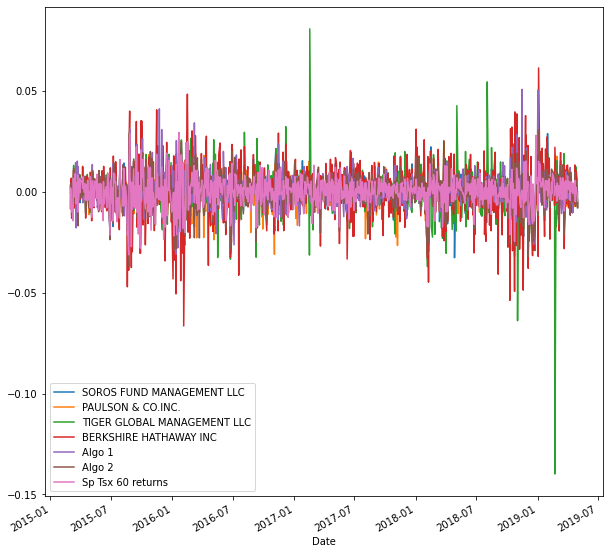

In [188]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (10,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

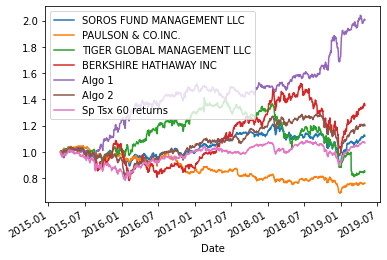

In [189]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

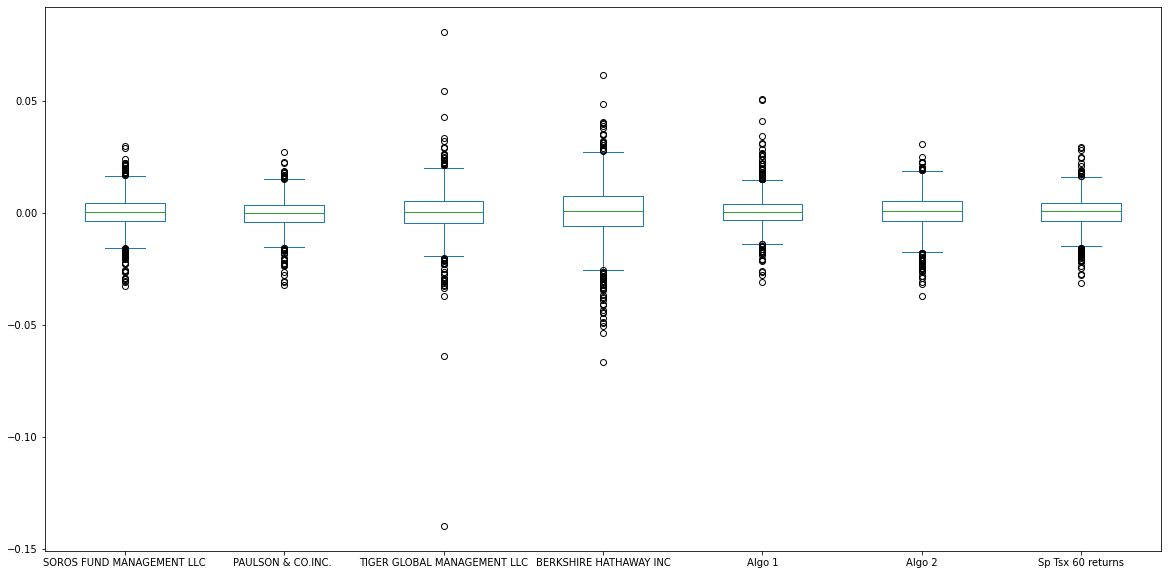

In [190]:
# Box plot to visually show risk
combined_returns.plot(kind = 'box',figsize=(20,10))

### Calculate Standard Deviations

In [576]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std.sort_values(ascending = False, inplace= True)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007590
Sp Tsx 60 returns              0.007031
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [596]:
# Determine which portfolios are riskier than the S&P TSX 60
print(f"Portfolios riskier than the S&P TSX 60 include:") 
print(str(daily_std[0:5]))

Portfolios riskier than the S&P TSX 60 include:
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007590
dtype: float64


### Calculate the Annualized Standard Deviation

In [505]:
# Calculate the annualized standard deviation (252 trading days)
volatility = daily_std * np.sqrt(252)
volatility.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120491
Sp Tsx 60 returns              0.111613
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

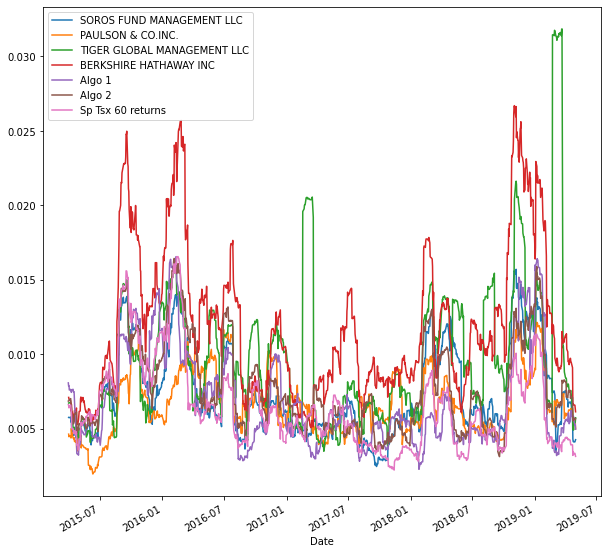

In [506]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,10))

### Calculate and plot the correlation

<AxesSubplot:>

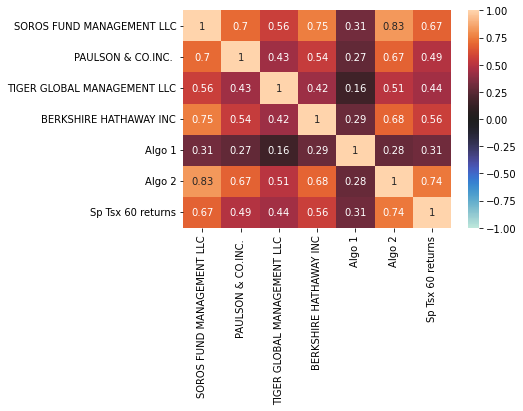

In [296]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation
sns.heatmap(correlation,vmin=-1, vmax=1,cmap= 'icefire',annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Algo 1 60 day rolling beta'}, xlabel='Date'>

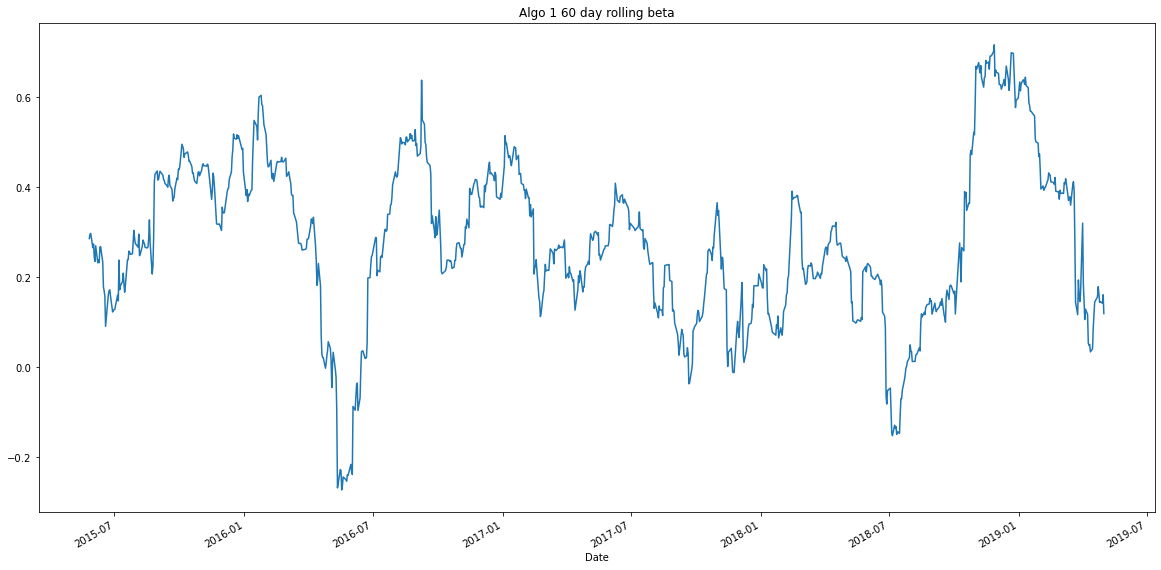

In [615]:
# Calculate covariance of a single portfolio
algo_cov = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['Sp Tsx 60 returns'])
# Calculate variance of S&P TSX
variance = combined_returns['Sp Tsx 60 returns'].rolling(window=60).var()
# Computing beta
algo1_beta = algo_cov / variance
# Plot beta trend
algo1_beta.plot(figsize=(20,10), title = 'Algo 1 60 day rolling beta' )

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

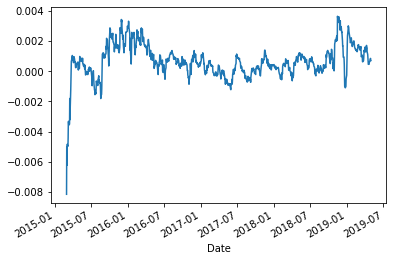

In [631]:
# Use `ewm` to calculate the rolling window
EMA = combined_returns['Algo 1'].ewm(halflife=21).mean()
EMA.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [329]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean()*252) / (volatility)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
Sp Tsx 60 returns              0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

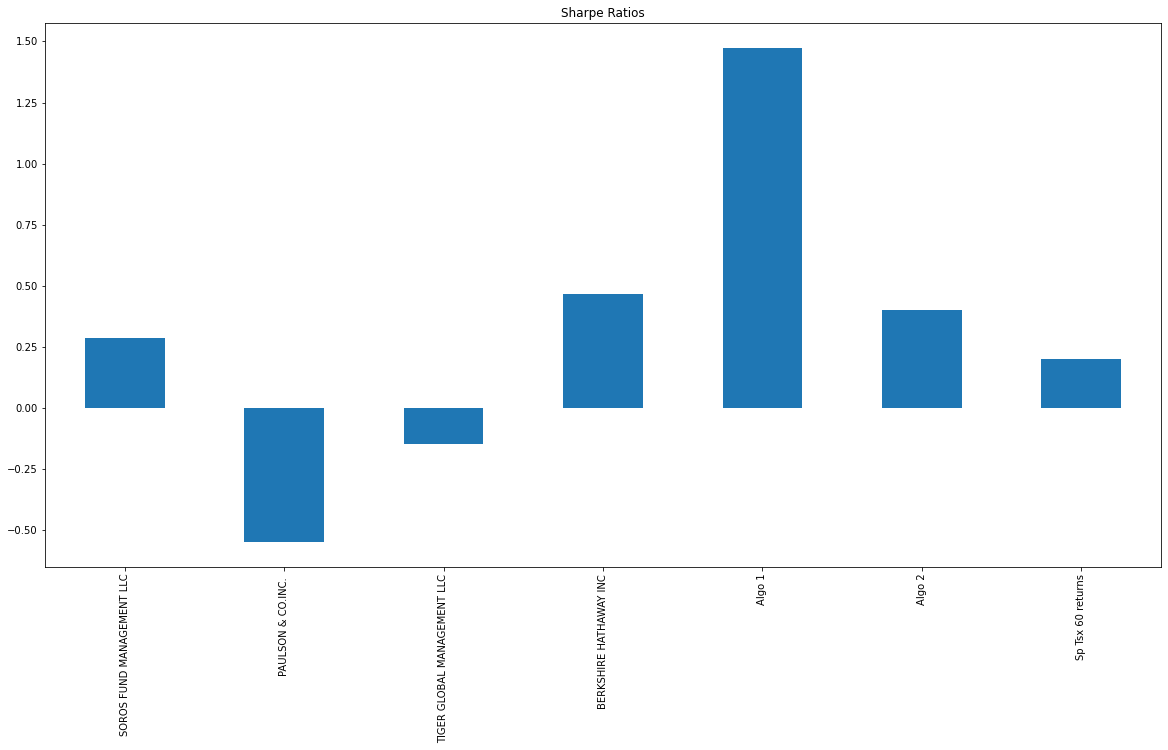

In [332]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title = 'Sharpe Ratios', figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [478]:
# Reading data from 1st stock
lstock = Path("../Starter_Code/l_historical.csv")
lstock = pd.read_csv(lstock, parse_dates=True, index_col="Date", infer_datetime_format=True)
lstock = lstock.drop(lstock.columns[[0]], axis=1)
lstock = lstock.rename(columns = {'Close':'L'})
lstock.sort_index(inplace = True)
lstock

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [479]:
# Reading data from 2nd stock
otex = Path("../Starter_Code/otex_historical.csv")
otex = pd.read_csv(otex, parse_dates=True, index_col="Date", infer_datetime_format=True)
otex = otex.drop(otex.columns[[0]], axis=1)
otex = otex.rename(columns = {'Close':'OTEX'})
otex.sort_index(inplace = True)
otex

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [480]:
# Reading data from 3rd stock
shop = Path("../Starter_Code/shop_historical.csv")
shop = pd.read_csv(shop, parse_dates=True, index_col="Date", infer_datetime_format=True)
shop = shop.drop(shop.columns[[0]], axis=1)
shop = shop.rename(columns = {'Close':'SHOP'})
shop.sort_index(inplace = True)
shop

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [481]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([lstock, otex,shop], axis = 'columns', join = 'inner')
my_portfolio.sort_index(inplace = True)
my_portfolio.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [600]:
# Calculate daily returns
my_returns = my_portfolio.pct_change()
# Drop NAs
my_returns.dropna(inplace=True)
# Display sample data
my_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [601]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [602]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([my_returns, combined_returns], axis = 'columns', join = 'inner')

In [603]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.sort_index(inplace=True)
all_returns.dropna()

,L,OTEX,SHOP,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp Tsx 60 returns
Date,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000174,-0.003715,0.017092,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003672,0.000773,0.012628,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002918,-0.006181,0.013173,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [604]:
# Calculate the annualized `std`
volatility = all_returns.std() * np.sqrt(252)
volatility.sort_values(ascending = False)

SHOP                           0.504079
BERKSHIRE HATHAWAY INC         0.227445
OTEX                           0.225703
TIGER GLOBAL MANAGEMENT LLC    0.219833
L                              0.162907
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
Sp Tsx 60 returns              0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

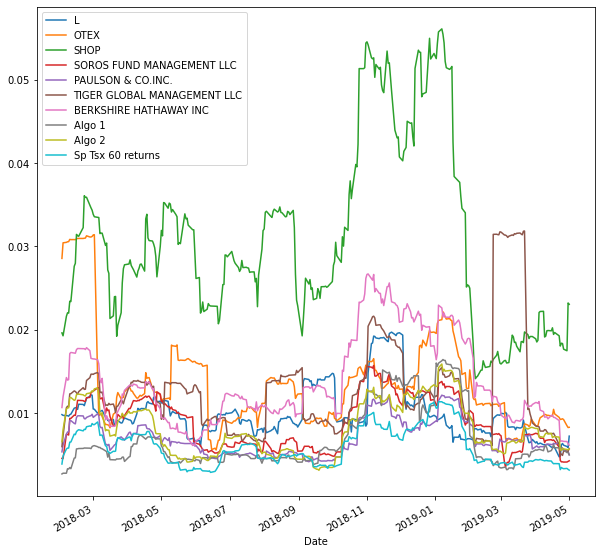

In [605]:
# Calculate rolling standard deviation
rolling_21std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_21std.plot(figsize=(10,10))

### Calculate and plot the correlation

<AxesSubplot:>

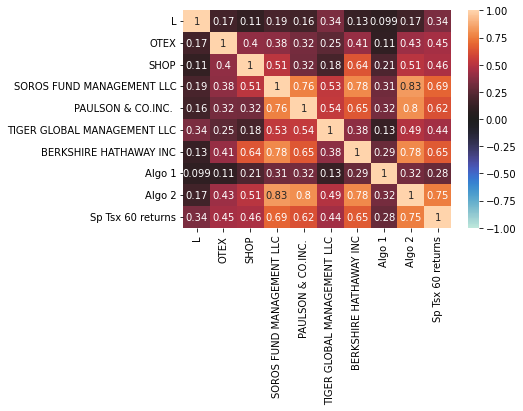

In [606]:
# Calculate and plot the correlation
corr = all_returns.corr()
sns.heatmap(corr,vmin=-1, vmax=1,cmap= 'icefire',annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My Portfolio 60 day rolling beta'}, xlabel='Date'>

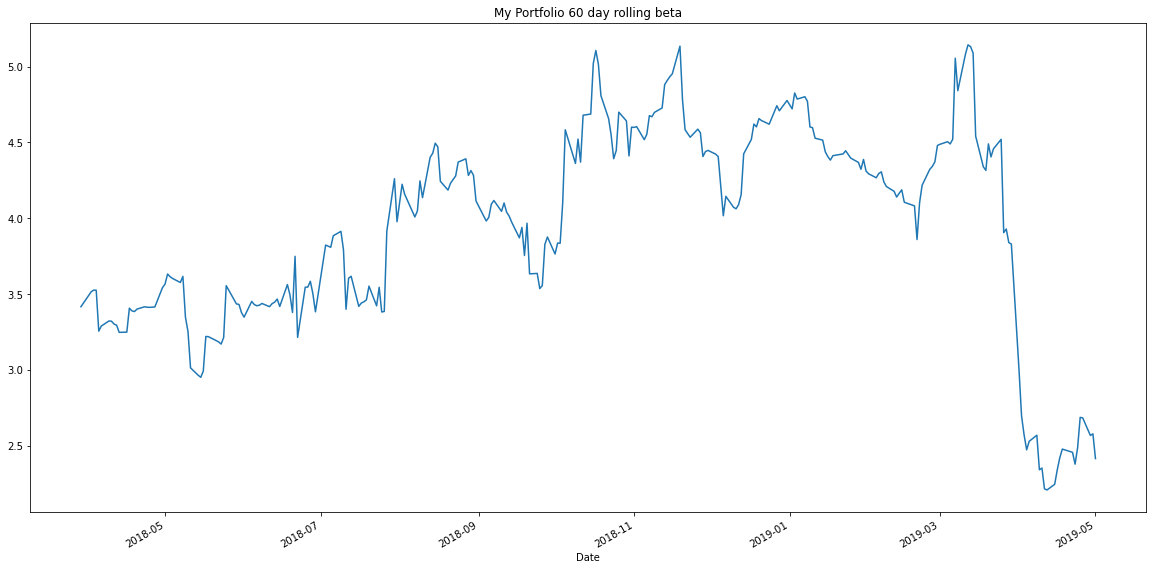

In [616]:
# Calculate and plot Beta
covariance = all_returns['L'].rolling(window=60).cov(combined_returns['Sp Tsx 60 returns'])
covariance1 = all_returns['SHOP'].rolling(window=60).cov(combined_returns['Sp Tsx 60 returns'])
covariance2 = all_returns['OTEX'].rolling(window=60).cov(combined_returns['Sp Tsx 60 returns'])
cov = covariance + covariance1 + covariance2
variance = all_returns['Sp Tsx 60 returns'].rolling(window=60).var()
my_beta = cov / variance
my_beta.plot(figsize=(20,10), title = 'My Portfolio 60 day rolling beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [618]:
# Calculate Annualized Sharpe Ratios
all_sharpes = (all_returns.mean()*252) / (volatility)
all_sharpes.sort_values(asc

L                              0.532599
OTEX                           0.762776
SHOP                           1.575294
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
Sp Tsx 60 returns              0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

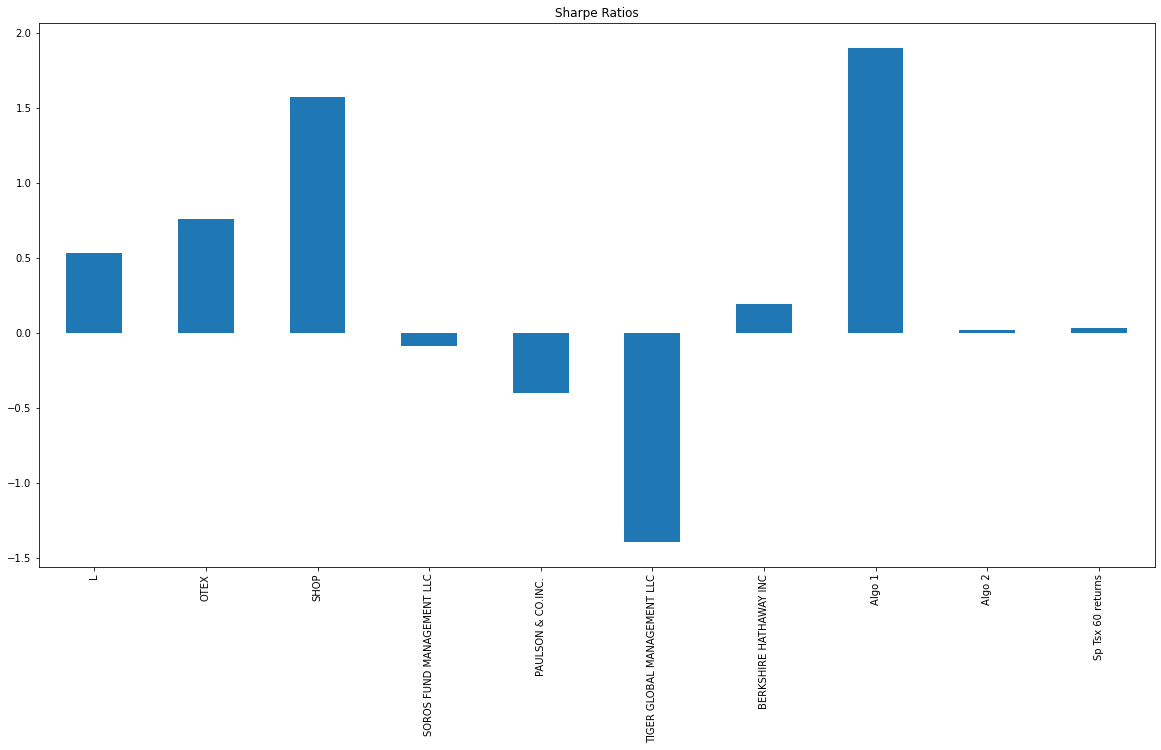

In [621]:
# Visualize the sharpe ratios as a bar plot
all_sharpes.plot(kind='bar', title = 'Sharpe Ratios', figsize = (20,10))

### How does your portfolio do?

Write your answer here!

In [625]:
print("My portfolio had a higher Sharpe Ratio than the S&P TSX 60 meaning it performed better than the market, it also performed better than the Whale Portfolio")
print("My portfolio also had a higher standard deviation meaning the risk was higher with my portfolio when compared to others")

My portfolio had a higher Sharpe Ratio than the S&P TSX 60 meaning it performed better than the market, it also performed better than the Whale Portfolio
My portfolio also had a higher standard deviation meaning the risk was higher with my portfolio when compared to others
